In [378]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


from xgboost import XGBRegressor

In [379]:
d = pd.read_csv('data/players_20.csv')
d.shape

(18278, 104)

In [380]:
d.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [381]:
l = list(d.columns)

In [382]:
di = dict(d.isnull().sum())
null_list = []
for i in di:
    try:
        if di[i] > 0:
            null_list.append(i)
    except:
        continue
print(null_list)

['release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']


In [383]:
#print(l[45:])

In [384]:
d['player_traits']=d['player_traits'].replace(np.nan, 'Unknown')


In [385]:
d['team_jersey_number']= d['team_jersey_number'].dropna

In [386]:
d['pace'] = d['pace'].fillna(0)

In [387]:
for i in null_list[:8]:
    d[i] = d[i].replace(np.nan,'Unknown')


In [388]:
for i in null_list[9:21]:
    d[i] = d[i].replace(np.nan,0)


    

In [389]:
#x = '93+2'
#x[:2]

In [390]:
def total_score(x):
    if x == '0':
        return int(x)
    y = int(x[:2])
    z = int(x[-1])
    c = y+z
    return c

In [391]:
null_list

['release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

In [392]:
for i in null_list[22:]:
    d[i] = d[i].replace(np.nan,'0')

In [393]:
for i in null_list[22:]:
    d[i] = d[i].apply(total_score)

In [394]:
for i in d['cam']:
    print(type(i))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

In [395]:
#d['ls'].unique()

In [396]:
#d['ls']

In [397]:
d.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,70,68,68,68,70,65,54,54,54,65
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,68,64,64,64,68,64,56,56,56,64
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,69,64,64,64,69,64,49,49,49,64
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,0,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,69,66,66,66,69,64,52,52,52,64


In [398]:
d['player_traits']

0        Beat Offside Trap, Argues with Officials, Earl...
1        Long Throw-in, Selfish, Argues with Officials,...
2        Power Free-Kick, Injury Free, Selfish, Early C...
3                               Flair, Acrobatic Clearance
4        Beat Offside Trap, Selfish, Finesse Shot, Spee...
                               ...                        
18273                                              Unknown
18274                                              Unknown
18275                                              Unknown
18276                                              Unknown
18277                                              Unknown
Name: player_traits, Length: 18278, dtype: object

In [399]:
d['overall']

0        94
1        93
2        92
3        91
4        91
         ..
18273    48
18274    48
18275    48
18276    48
18277    48
Name: overall, Length: 18278, dtype: int64

In [400]:
d['player_traits'] = d['player_traits'].replace(np.nan, 'unknown')
d['player_traits']

0        Beat Offside Trap, Argues with Officials, Earl...
1        Long Throw-in, Selfish, Argues with Officials,...
2        Power Free-Kick, Injury Free, Selfish, Early C...
3                               Flair, Acrobatic Clearance
4        Beat Offside Trap, Selfish, Finesse Shot, Spee...
                               ...                        
18273                                              Unknown
18274                                              Unknown
18275                                              Unknown
18276                                              Unknown
18277                                              Unknown
Name: player_traits, Length: 18278, dtype: object

In [401]:
#d.isnull().sum()
d['final_trait'] = d['player_traits'] + d['player_positions']

In [402]:
v = d

In [403]:
v.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,final_trait
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68,68,68,70,65,54,54,54,65,"Beat Offside Trap, Argues with Officials, Earl..."
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,64,64,64,68,64,56,56,56,64,"Long Throw-in, Selfish, Argues with Officials,..."
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,64,64,64,69,64,49,49,49,64,"Power Free-Kick, Injury Free, Selfish, Early C..."
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,0,0,0,0,0,0,0,0,0,"Flair, Acrobatic ClearanceGK"
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66,66,66,69,64,52,52,52,64,"Beat Offside Trap, Selfish, Finesse Shot, Spee..."


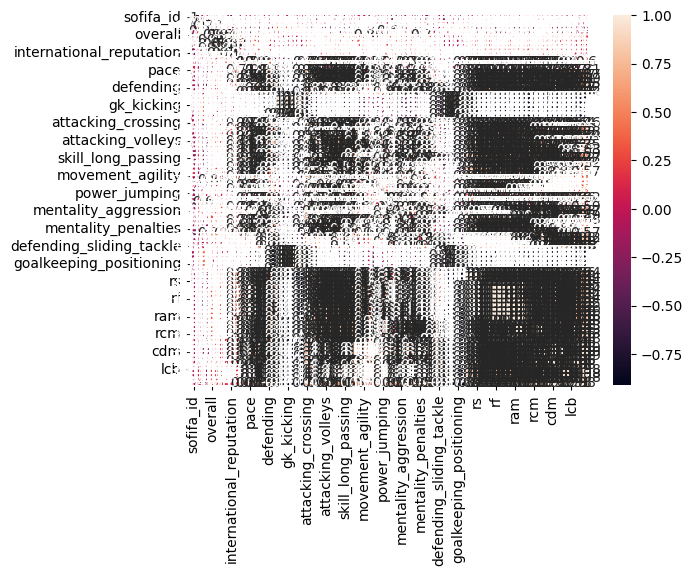

In [404]:
corr_matrix = v.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [405]:
corr_matrix. style. background_gradient (cmap = 'BrBG')  

In [406]:
v = v.drop(['player_url','sofifa_id','height_cm','weight_kg'],axis =1 )

In [407]:
v = v.drop(['nation_jersey_number'],axis =1)

In [408]:
v = v.drop(['dob'],axis = 1)

In [409]:
v = v.drop(['real_face'],axis =1 )

In [410]:
v.columns

Index(['short_name', 'long_name', 'age', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'release_clause_eur',
       'player_tags', 'team_position', 'team_jersey_number', 'loaned_from',
       'joined', 'contract_valid_until', 'nation_position', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 

In [411]:
v['attack_score'] = (v['attacking_crossing'] + v['attacking_finishing'] + v['attacking_heading_accuracy'] + v['attacking_short_passing'] + v['attacking_volleys'])/5

In [412]:
v['skill_score'] = (v['skill_ball_control']+v['skill_curve']+v['skill_dribbling'] + v['skill_fk_accuracy'] + v['skill_moves'] + v['skill_long_passing'])/6

In [413]:
v['movement_score'] = (v['movement_acceleration']+v['movement_balance']+v['movement_agility']+v['movement_sprint_speed']+v['movement_reactions'])/5

In [414]:
v['power_score'] = (v['power_jumping']+v['power_long_shots']+v['power_shot_power']+v['power_stamina']+v['power_strength'])/5

In [415]:
v['mentality_score'] = (v['mentality_aggression']+v['mentality_composure']+v['mentality_interceptions']+v['mentality_penalties']+v['mentality_positioning']+v['mentality_vision'])/6

In [416]:
v['defending_score'] =  (v['defending_marking']+v['defending_sliding_tackle']+v['defending_standing_tackle'])/3

In [417]:
v['goalie_score'] = (v['goalkeeping_diving']+v['goalkeeping_handling']+v['goalkeeping_kicking']+v['goalkeeping_positioning']+v['goalkeeping_reflexes'])/5

In [418]:
#v['power_score']

In [419]:
#v['skill_score']

In [420]:
#v['defending_score']

In [421]:
#v['goalkeeping_diving']

In [422]:
v = v.drop(['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys'],axis = 1)

In [423]:
v = v.drop (['skill_ball_control','skill_curve','skill_dribbling','skill_fk_accuracy','skill_moves','skill_long_passing'],axis=1)

In [424]:
v = v.drop(['movement_acceleration','movement_balance','movement_agility','movement_sprint_speed','movement_reactions'],axis =1 )

In [425]:
v = v.drop(['power_jumping','power_long_shots','power_shot_power','power_stamina','power_strength'],axis = 1)

In [426]:
v = v.drop(['mentality_aggression','mentality_composure','mentality_interceptions','mentality_penalties','mentality_positioning','mentality_vision'],axis =1 )

In [427]:
v = v.drop(['defending_marking','defending_sliding_tackle','defending_standing_tackle'],axis = 1)

In [428]:
#v.columns

In [429]:
#v['body_type'].unique()

In [430]:
v = v.drop(['body_type'],axis =1 )

In [431]:
v['club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Atlético Madrid', 'Real Madrid', 'Manchester City', 'Liverpool',
       'Napoli', 'Tottenham Hotspur', 'Manchester United', 'Chelsea',
       'FC Bayern München', 'Inter', 'Borussia Dortmund', 'Arsenal',
       'Valencia CF', 'Lazio', 'Milan', 'Sporting CP',
       'Olympique Lyonnais', 'RB Leipzig', 'Ajax', 'LA Galaxy',
       'Atalanta', 'RC Celta', 'Bayer 04 Leverkusen', 'Real Betis',
       'FC Porto', 'SV Werder Bremen', 'West Ham United',
       'Wolverhampton Wanderers', 'AS Saint-Étienne', 'Torino',
       'Dalian YiFang FC', 'Borussia Mönchengladbach', 'Roma',
       'Guangzhou Evergrande Taobao FC', 'SL Benfica',
       'Medipol Başakşehir FK', 'Everton', 'VfL Wolfsburg',
       'Crystal Palace', 'Getafe CF', 'Shanghai SIPG FC',
       'Eintracht Frankfurt', 'Olympique de Marseille', 'Hertha BSC',
       'RSC Anderlecht', 'Villarreal CF', 'Sampdoria', 'Leicester City',
       'AS Monaco', 'Jiangsu Suning FC', '

In [432]:
u = v
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
u['club']= label_encoder.fit_transform(u['club'])
  
#u['club'].unique()


In [433]:

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
u['nationality']= label_encoder.fit_transform(u['nationality'])
  
#u['nationality'].unique()

In [434]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
u['player_positions']= label_encoder.fit_transform(u['player_positions'])
  
#u['player_positions'].unique()

In [435]:
#v['player_traits']

In [436]:
#u.columns

In [437]:
u = u.drop(['player_traits','joined','player_tags','contract_valid_until','nation_position'],axis = 1)

In [438]:
u.columns

Index(['short_name', 'long_name', 'age', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot', 'work_rate',
       'release_clause_eur', 'team_position', 'team_jersey_number',
       'loaned_from', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'final_trait', 'attack_score', 'skill_score',
       'movement_score', 'power_score', 'mentality_score', 'defending_score',
       'goalie_score'],
      dtype='object')

In [439]:
u.columns

Index(['short_name', 'long_name', 'age', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot', 'work_rate',
       'release_clause_eur', 'team_position', 'team_jersey_number',
       'loaned_from', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'final_trait', 'attack_score', 'skill_score',
       'movement_score', 'power_score', 'mentality_score', 'defending_score',
       'goalie_score'],
      dtype='object')

In [440]:
u['team_position']

0         RW
1         LW
2        CAM
3         GK
4         LW
        ... 
18273    RES
18274    SUB
18275    SUB
18276    SUB
18277    SUB
Name: team_position, Length: 18278, dtype: object

In [441]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
u['team_position']= label_encoder.fit_transform(u['team_position'])
  
u['team_position'].unique()

u

,short_name,long_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,...,rcb,rb,final_trait,attack_score,skill_score,movement_score,power_score,mentality_score,defending_score,goalie_score
0,L. Messi,Lionel Andrés Messi Cuccittini,32,5,224,94,94,95500000,565000,544,...,54,65,"Beat Offside Trap, Argues with Officials, Earl...",86.6,79.333333,91.6,78.2,74.500000,32.000000,10.8
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,121,350,93,93,58500000,405000,620,...,56,64,"Long Throw-in, Selfish, Argues with Officials,...",87.4,70.000000,86.8,89.2,74.833333,28.000000,11.6
2,Neymar Jr,Neymar da Silva Santos Junior,27,18,462,92,92,105500000,290000,344,...,49,64,"Power Free-Kick, Injury Free, Selfish, Early C...",82.0,75.333333,91.0,71.0,74.666667,27.333333,11.8
3,J. Oblak,Jan Oblak,26,133,63,91,93,77500000,125000,226,...,0,0,"Flair, Acrobatic ClearanceGK",19.0,18.333333,61.4,53.6,34.666667,19.000000,87.2
4,E. Hazard,Eden Hazard,28,12,505,91,91,90000000,470000,350,...,52,64,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",79.6,73.000000,92.2,73.0,75.000000,27.666667,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,邵帅,22,28,79,48,56,40000,2000,55,...,48,47,UnknownCB,28.0,22.166667,54.4,45.8,37.833333,49.000000,8.4
18274,Xiao Mingjie,Mingjie Xiao,22,28,574,48,56,40000,2000,55,...,49,48,UnknownCB,31.4,26.166667,55.2,44.8,35.166667,50.666667,10.6
18275,Zhang Wei,张威,19,28,317,48,56,40000,1000,155,...,51,49,UnknownCM,39.8,35.000000,54.0,47.0,41.000000,48.000000,9.0
18276,Wang Haijian,汪海健,18,28,573,48,54,40000,1000,155,...,51,50,UnknownCM,40.4,36.166667,57.2,46.4,43.500000,45.666667,12.4


In [442]:
#u['preferred_foot'] = label_encoder.fit_transform(u['preferred_foot'])

In [443]:
u = u.drop(['team_jersey_number','loaned_from','gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning'],axis = 1)

In [444]:
u.columns

Index(['short_name', 'long_name', 'age', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot', 'work_rate',
       'release_clause_eur', 'team_position', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'final_trait', 'attack_score', 'skill_score',
       'movement_score', 'power_score', 'mentality_score', 'defending_score',
       'goalie_score'],
      dtype='object')

In [445]:
#u.corr(). style. background_gradient (cmap = 'BrBG')  

In [446]:
u = u.drop(['player_positions','preferred_foot'],axis =1 )

In [447]:
#u['preffered_foot'] = v['preferred_foot']
#u['preferred_foot']= label_encoder.fit_transform(u['prefferred_foot'])

In [448]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
u['work_rate']= label_encoder.fit_transform(u['work_rate'])
  
u['work_rate'].unique()


array([7, 1, 2, 8, 0, 6, 3, 5, 4])

In [449]:
X = u.drop(['short_name','long_name','ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb','overall','final_trait'],axis =1 )


In [450]:
#X.columns
y = u['overall']

In [451]:
#X = X.drop(['attacking_crossing', 'attacking_finishing',
       #'attacking_heading_accuracy', ',
       #'attacking_volleys'],axis=1)

X.columns

Index(['age', 'nationality', 'club', 'potential', 'value_eur', 'wage_eur',
       'international_reputation', 'weak_foot', 'work_rate',
       'release_clause_eur', 'team_position', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'attack_score',
       'skill_score', 'movement_score', 'power_score', 'mentality_score',
       'defending_score', 'goalie_score'],
      dtype='object')

In [452]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle= True, random_state = 42)


In [453]:
X['release_clause_eur'] = X['release_clause_eur'].replace('Unknown',sum(X['value_eur']+X['wage_eur']))
X = X.drop(['team_position'],axis=1)

In [454]:
#X= X.drop(['preffered_foot'],axis =1 )

In [455]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle= True, random_state = 42)


In [456]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 300,random_state = 41)
regressor.fit(X_train,y_train)
y_test_pred = regressor.predict(X_test)

print('-'*70)
print('Random Forest Regression model')
print('-'*70)
print(f'train score : {regressor.score(X_train, y_train)}')
print(f'test score  : {regressor.score(X_test, y_test)}')
print('-'*70)
print(f'r2 score for test  : {r2_score(y_test, y_test_pred)}')


----------------------------------------------------------------------
Random Forest Regression model
----------------------------------------------------------------------
train score : 0.9995869527514853
test score  : 0.9971513664419162
----------------------------------------------------------------------
r2 score for test  : 0.9971513664419162


In [457]:
from sklearn import metrics

print(f'MAE:{metrics.mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE:{metrics.mean_squared_error(y_test, y_test_pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}')

MAE:0.2061132385120348
MSE:0.13459400376853878
RMSE:0.36687055451281286


In [458]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_test_pred = xgb.predict(X_test)

print('-'*70)
print('')
print('-'*70)
print(f'train score : {xgb.score(X_train, y_train)}')
print(f'test score  : {xgb.score(X_test, y_test)}')
print('-'*70)
print(f'r2 score for test  : {r2_score(y_test, y_test_pred)}')


----------------------------------------------------------------------

----------------------------------------------------------------------
train score : 0.9991076976857618
test score  : 0.9966601058192852
----------------------------------------------------------------------
r2 score for test  : 0.9966601058192852


In [459]:
from sklearn import metrics

print(f'MAE:{metrics.mean_absolute_error(y_test, y_test_pred)}')
print(f'MSE:{metrics.mean_squared_error(y_test, y_test_pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}')

MAE:0.2648406863473437
MSE:0.1578053901211598
RMSE:0.39724726571892194


# COSINE SIMILARITY

In [460]:
name = list(d['long_name'])
trait = list(d['final_trait'])
res = {}
for key in name :
    for j in trait:
        res[key] = j
        trait.remove(j)
        break
    

#res

In [461]:
def similarity(new_data,s,tr):
    similar = []
    vectorizer = TfidfVectorizer()
    for i in new_data:
        
            if i == s:
                continue
            corpus = [new_data[i],tr]
            trsfm=vectorizer.fit_transform(corpus)
            doc1 = trsfm[0:1].todense()
            doc2 = trsfm[1:2].todense()
            doc_1 = []

            for k in range(len(doc1[0])):
                doc_1.append(doc1[k])
            doc_2 = []
            for u in range(len(doc2[0])):
                doc_2.append(doc2[u])
            doc_1 = np.squeeze(np.asarray(doc_1))
            doc_2 = np.squeeze(np.asarray(doc_2))
            # Dot and norm
            dot = sum(a*b for a, b in zip(doc_1, doc_2))
            norm_a = sum(a*a for a in doc_1) ** 0.5
            norm_b = sum(b*b for b in doc_2) ** 0.5

            # Cosine similarity
            cos_sim = dot / (norm_a*norm_b)
            #print([i,j,cos_sim])
            
            similar.append([i,s,cos_sim])
    return similar


In [462]:
s = input("Enter player name")
tr = input("Enter traits of that player")
pos = input("Enter the position of that player ")
tr = tr  + " " + pos
similar = similarity(res,s,tr)
cols = ['Name1','Name2','similarity']
s_df = pd.DataFrame(similar,columns=cols)

In [463]:
sorted_sdf = s_df.sort_values('similarity',ascending=False)
sorted_sdf.head()

,Name1,Name2,similarity
5935,Sergio Henrique Santos Gomes,eden hazard,0.450268
4399,Reziuan Mirzov,eden hazard,0.411207
665,David Villa Sánchez,eden hazard,0.411207
5080,Aleksandar Trajkovski,eden hazard,0.380817
3093,Saúl Berjón Pérez,eden hazard,0.380817


In [470]:
v.sort_values("defending_score",ascending = False).head()

,short_name,long_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,...,rcb,rb,final_trait,attack_score,skill_score,movement_score,power_score,mentality_score,defending_score,goalie_score
16,G. Chiellini,Giorgio Chiellini,34,77,350,89,89,24500000,215000,55,...,89,79,"Inflexible, Power Free-Kick, Injury Prone, Lon...",56.0,46.333333,66.0,72.8,65.166667,91.333333,3.0
11,K. Koulibaly,Kalidou Koulibaly,28,129,425,89,91,67500000,150000,55,...,89,80,Long Passer (CPU AI Only)CB,44.0,43.500000,64.2,63.8,62.833333,89.333333,8.6
7,V. van Dijk,Virgil van Dijk,27,108,389,90,91,78000000,200000,55,...,90,84,"Diver, Avoids Using Weaker Foot, Leadership, L...",62.8,59.833333,71.0,80.4,72.333333,89.333333,11.6
50,T. Alderweireld,Toby Alderweireld,30,12,626,87,87,41000000,155000,55,...,87,83,LeadershipCB,61.6,59.333333,64.6,75.4,71.500000,88.666667,13.2
35,D. Godín,Diego Godín,33,155,341,88,88,28000000,135000,55,...,89,80,"Injury Prone, Long Passer (CPU AI Only)CB",61.6,49.500000,62.4,70.8,67.833333,88.666667,9.8
